1. Apply high pass laplacian filter on Car.jpg image

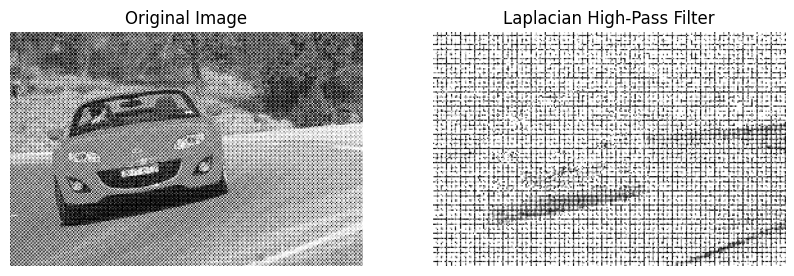

In [6]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/car.jpg'  # Replace this with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
else:
    # Apply the Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Convert the Laplacian image to uint8
    laplacian = cv2.convertScaleAbs(laplacian)

    # Display the original and filtered images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Laplacian High-Pass Filter')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.show()


2. Apply ideal high-pass filter on Car.jpg image for D0=100


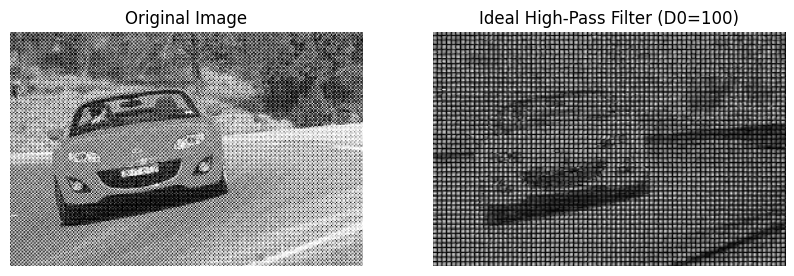

In [2]:


def ideal_high_pass_filter(img, D0):
    # Get the image dimensions
    rows, cols = img.shape

    # Create a mask with the same size as the image
    mask = np.ones((rows, cols), np.uint8)

    # Get the center of the image
    crow, ccol = rows // 2, cols // 2

    # Create the ideal high-pass filter
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D <= D0:
                mask[u, v] = 0

    # Perform the Fourier Transform
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Apply the mask
    dft_shift[:, :, 0] = dft_shift[:, :, 0] * mask
    dft_shift[:, :, 1] = dft_shift[:, :, 1] * mask

    # Perform the inverse Fourier Transform
    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

# Load the image

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
else:
    # Apply the ideal high-pass filter
    D0 = 100  # Cut-off frequency
    filtered_image = ideal_high_pass_filter(image, D0)

    # Display the original and filtered images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Ideal High-Pass Filter (D0=100)')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()


3. Apply ideal low-pass filter on Car.jpg image for D0=100


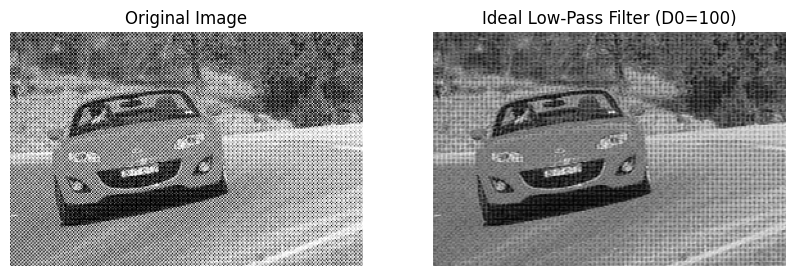

In [3]:


def ideal_low_pass_filter(img, D0):
    # Get the image dimensions
    rows, cols = img.shape

    # Create a mask with the same size as the image
    mask = np.zeros((rows, cols), np.uint8)

    # Get the center of the image
    crow, ccol = rows // 2, cols // 2

    # Create the ideal low-pass filter
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D <= D0:
                mask[u, v] = 1

    # Perform the Fourier Transform
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Apply the mask
    dft_shift[:, :, 0] = dft_shift[:, :, 0] * mask
    dft_shift[:, :, 1] = dft_shift[:, :, 1] * mask

    # Perform the inverse Fourier Transform
    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

# Load the image

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
else:
    # Apply the ideal low-pass filter
    D0 = 100  # Cut-off frequency
    filtered_image = ideal_low_pass_filter(image, D0)

    # Display the original and filtered images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Ideal Low-Pass Filter (D0=100)')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()


4. Apply FFT2, IFFT2, low-pass Gaussian filter, and high-pass laplacian filter on Car.jpg image.

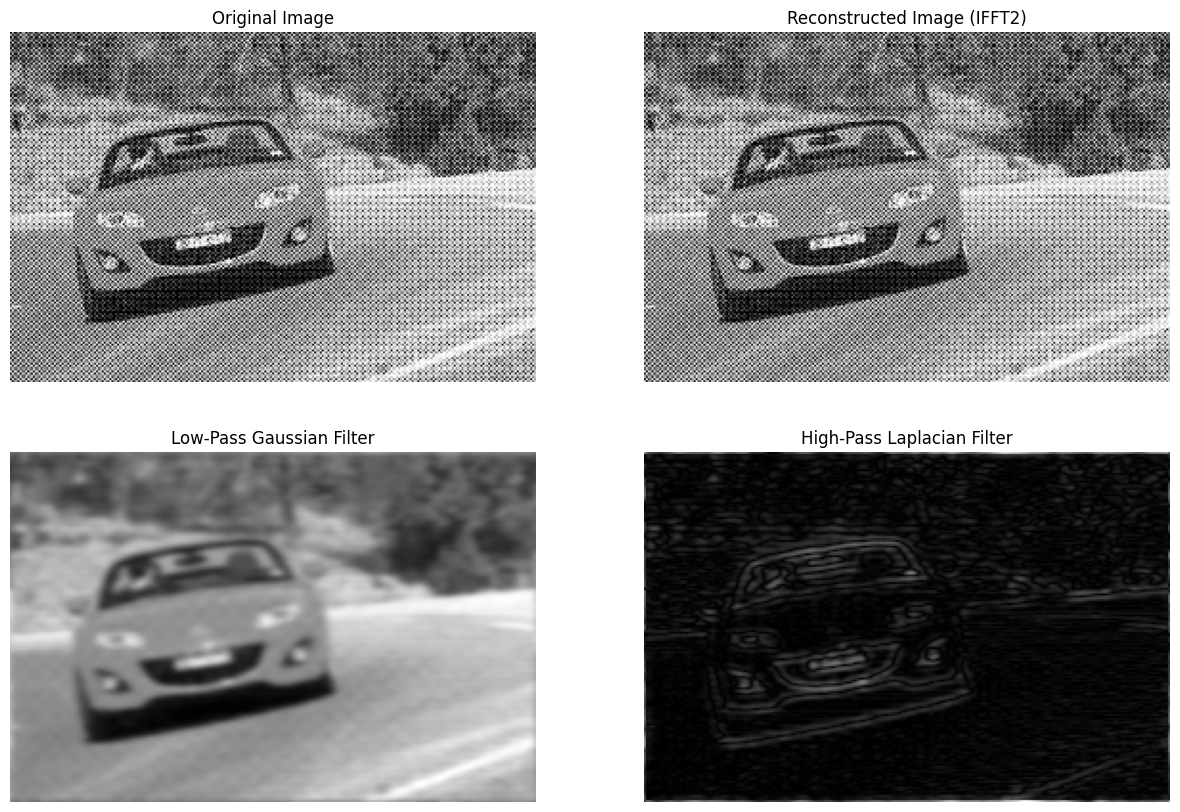

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/car.jpg'  # Replace this with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
else:
    # FFT2
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # IFFT2
    ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(ishift)
    img_back = np.abs(img_back)

    # Apply low-pass Gaussian filter
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2

    # Create a Gaussian mask
    def create_gaussian_mask(shape, sigma):
        rows, cols = shape
        crow, ccol = rows // 2 , cols // 2
        x = np.linspace(-cols/2, cols/2, cols)
        y = np.linspace(-rows/2, rows/2, rows)
        x, y = np.meshgrid(x, y)
        d = np.sqrt(x*x + y*y)
        g = np.exp(-(d**2 / (2.0 * sigma**2)))
        return g

    sigma = 20
    mask = create_gaussian_mask((rows, cols), sigma)

    fshift_lp = fshift * mask
    ishift_lp = np.fft.ifftshift(fshift_lp)
    img_lp = np.fft.ifft2(ishift_lp)
    img_lp = np.abs(img_lp)

    # Apply high-pass Laplacian filter
    laplacian = cv2.Laplacian(img_lp, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)

    # Display the results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Reconstructed Image (IFFT2)')
    plt.imshow(img_back, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Low-Pass Gaussian Filter')
    plt.imshow(img_lp, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('High-Pass Laplacian Filter')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.show()


5. Apply the necessary filter and correct the noise in the image. Image file is uploaded.

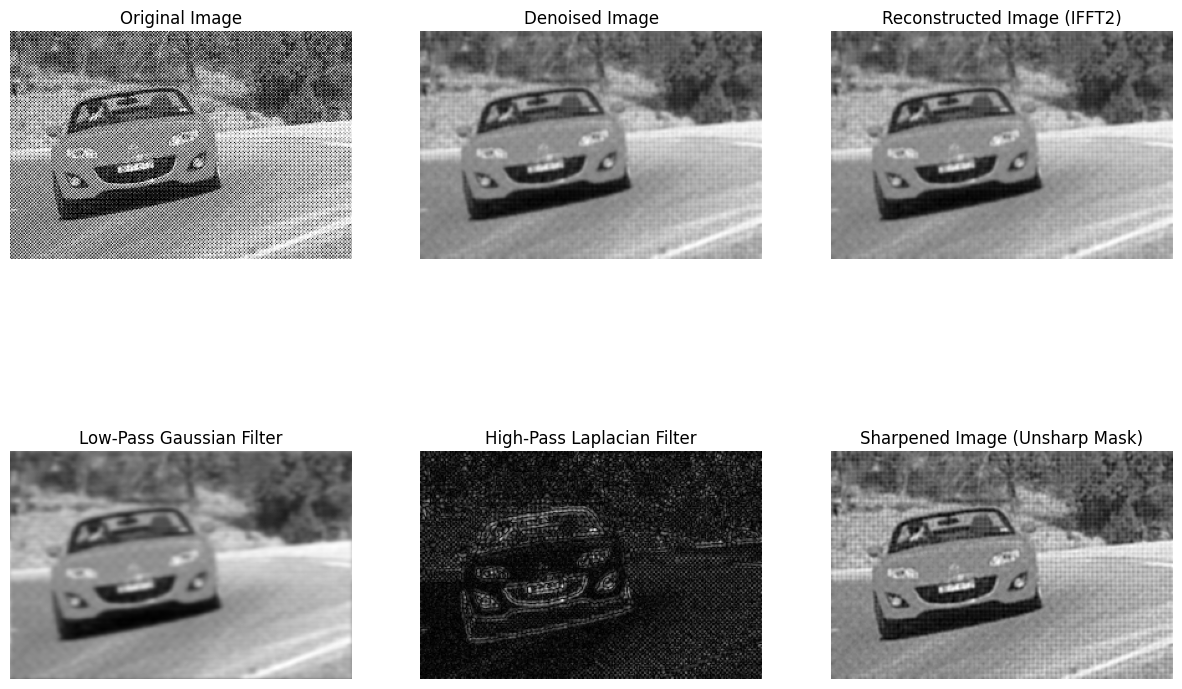

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/car.jpg'  # Path to the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
else:
    # Apply Gaussian Blur to remove noise
    image_denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # FFT2
    f = np.fft.fft2(image_denoised)
    fshift = np.fft.fftshift(f)

    # IFFT2
    ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(ishift)
    img_back = np.abs(img_back)

    # Apply low-pass Gaussian filter
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2

    # Create a Gaussian mask
    def create_gaussian_mask(shape, sigma):
        rows, cols = shape
        x = np.linspace(-cols/2, cols/2, cols)
        y = np.linspace(-rows/2, rows/2, rows)
        x, y = np.meshgrid(x, y)
        d = np.sqrt(x*x + y*y)
        g = np.exp(-(d**2 / (2.0 * sigma**2)))
        return g

    sigma = 30
    mask = create_gaussian_mask((rows, cols), sigma)

    fshift_lp = fshift * mask
    ishift_lp = np.fft.ifftshift(fshift_lp)
    img_lp = np.fft.ifft2(ishift_lp)
    img_lp = np.abs(img_lp)

    # Apply high-pass Laplacian filter
    laplacian = cv2.Laplacian(image_denoised, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)

    # Unsharp Masking
    def unsharp_mask(image, sigma=1.0, strength=1.5, threshold=0):
        blurred = cv2.GaussianBlur(image, (0, 0), sigma)
        sharpened = float(strength + 1) * image - float(strength) * blurred
        sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
        sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
        sharpened = sharpened.round().astype(np.uint8)

        if threshold > 0:
            low_contrast_mask = np.absolute(image - blurred) < threshold
            np.copyto(sharpened, image, where=low_contrast_mask)

        return sharpened

    sharp_image = unsharp_mask(image_denoised)

    # Display the results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Denoised Image')
    plt.imshow(image_denoised, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Reconstructed Image (IFFT2)')
    plt.imshow(img_back, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Low-Pass Gaussian Filter')
    plt.imshow(img_lp, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('High-Pass Laplacian Filter')
    plt.imshow(laplacian, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title('Sharpened Image (Unsharp Mask)')
    plt.imshow(sharp_image, cmap='gray')
    plt.axis('off')

    plt.show()


6. Apply the sobel operator (filter) on Car.jpg in the Fourier domain to detect edges.

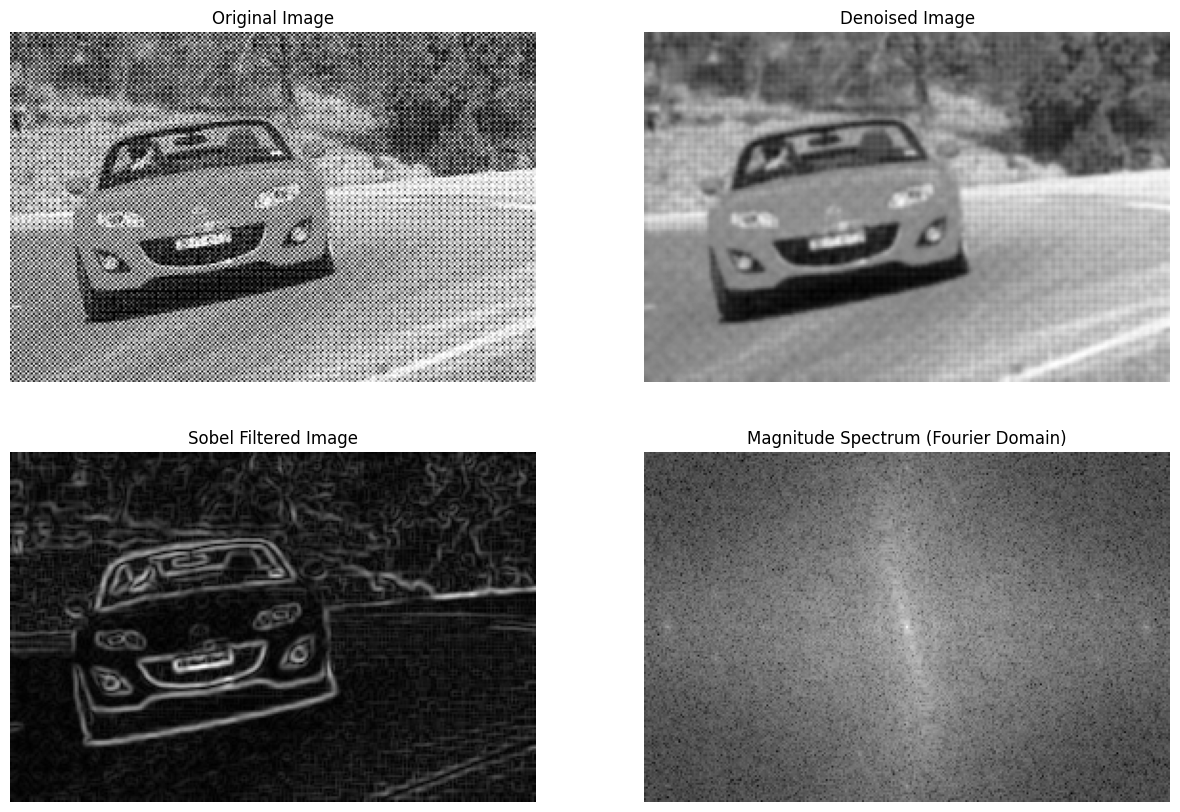

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/car.jpg'  # Path to the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
else:
    # Apply Gaussian Blur to remove noise
    image_denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Sobel operator in the spatial domain
    sobelx = cv2.Sobel(image_denoised, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image_denoised, cv2.CV_64F, 0, 1, ksize=3)

    sobel = np.hypot(sobelx, sobely)  # Combine Sobel X and Y

    # FFT2 of the Sobel-filtered image
    f_sobel = np.fft.fft2(sobel)
    fshift_sobel = np.fft.fftshift(f_sobel)

    # Magnitude Spectrum for visualization
    magnitude_spectrum = np.log(1 + np.abs(fshift_sobel))

    # Display the results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Denoised Image')
    plt.imshow(image_denoised, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Sobel Filtered Image')
    plt.imshow(sobel, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Magnitude Spectrum (Fourier Domain)')
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis('off')

    plt.show()


7. Discuss applying Butterworth and Chebyshev filters and compare the output image with the
Gaussian Filter image (You may use a preferred image to discuss the characteristics of the
output images in Q7.)

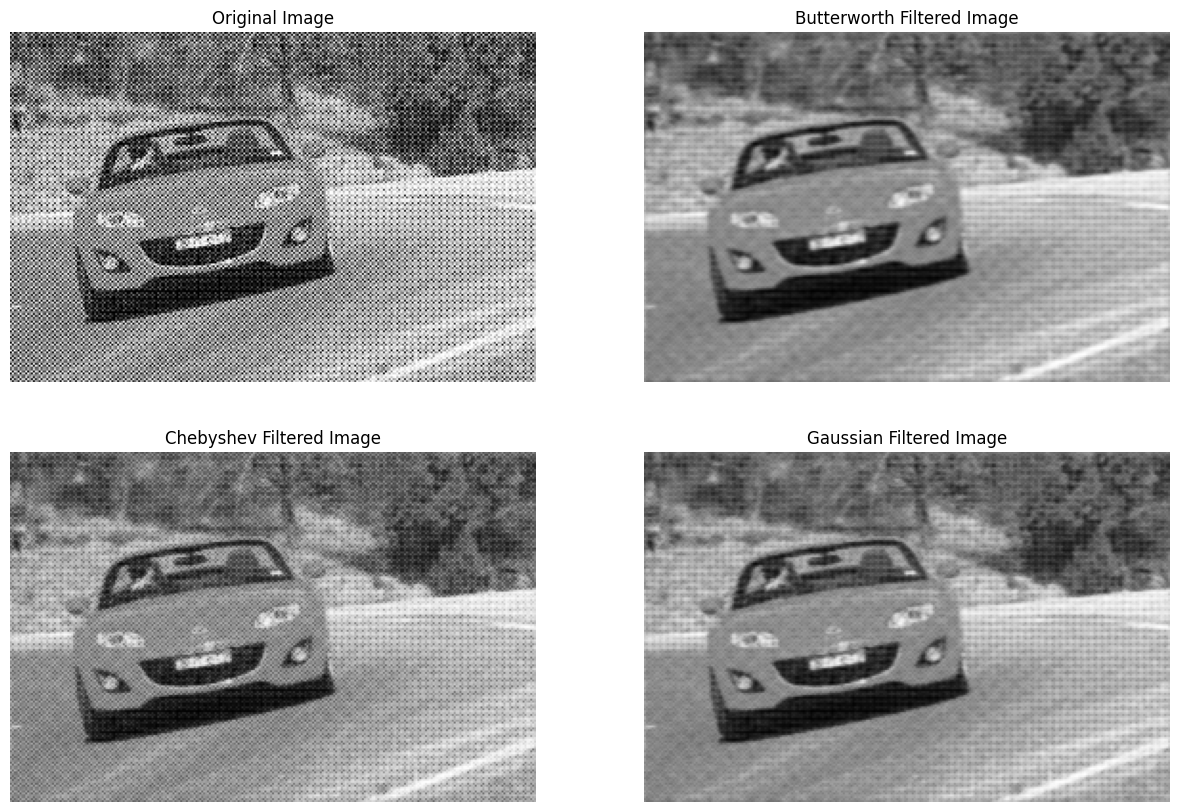

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/car.jpg'  # Adjust the path accordingly
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
    exit()

# FFT2
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Butterworth filter
def butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt((X - 0)**2 + (Y - 0)**2)
    filter = 1 / (1 + (distance / cutoff)**(2 * order))
    return filter

# Chebyshev filter
def chebyshev_filter(shape, cutoff, ripple):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt((X - 0)**2 + (Y - 0)**2)
    filter = 1 / (1 + ripple * (distance / cutoff)**2)
    return filter

# Gaussian filter
def gaussian_filter(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    d = np.sqrt(X*X + Y*Y)
    g = np.exp(-(d**2 / (2.0 * sigma**2)))
    return g

# Apply filters
butterworth_mask = butterworth_filter(image.shape, 50, 2)
chebyshev_mask = chebyshev_filter(image.shape, 50, 0.5)
gaussian_mask = gaussian_filter(image.shape, 50)

fshift_butterworth = fshift * butterworth_mask
fshift_chebyshev = fshift * chebyshev_mask
fshift_gaussian = fshift * gaussian_mask

# Inverse FFT to get images
def apply_inverse_fft(fshift):
    ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(ishift)
    img_back = np.abs(img_back)
    return img_back

img_butterworth = apply_inverse_fft(fshift_butterworth)
img_chebyshev = apply_inverse_fft(fshift_chebyshev)
img_gaussian = apply_inverse_fft(fshift_gaussian)

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Butterworth Filtered Image')
plt.imshow(img_butterworth, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Chebyshev Filtered Image')
plt.imshow(img_chebyshev, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Gaussian Filtered Image')
plt.imshow(img_gaussian, cmap='gray')
plt.axis('off')

plt.show()
